Import the libraries

In [1]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
import seaborn as sns

/home/jacobr/Documents/Masters/MSc_SML/scientific-machine-learning-project/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Import data

In [2]:
path = 'data/ppi_merged.csv'
ppi_merged_df = pd.read_csv(path)

for col in ppi_merged_df.columns:
    print(col)

domain
sequence
normalized_length
normalized_abs_surf_acc
normalized_hydropathy_index
rel_surf_acc
prob_sheet
prob_helix
prob_coil
pssm_A
pssm_R
pssm_N
pssm_D
pssm_C
pssm_Q
pssm_E
pssm_G
pssm_H
pssm_I
pssm_L
pssm_K
pssm_M
pssm_F
pssm_P
pssm_S
pssm_T
pssm_W
pssm_Y
pssm_V
3_wm_normalized_abs_surf_acc
5_wm_normalized_abs_surf_acc
7_wm_normalized_abs_surf_acc
9_wm_normalized_abs_surf_acc
3_wm_normalized_hydropathy_index
5_wm_normalized_hydropathy_index
7_wm_normalized_hydropathy_index
9_wm_normalized_hydropathy_index
3_wm_rel_surf_acc
5_wm_rel_surf_acc
7_wm_rel_surf_acc
9_wm_rel_surf_acc
3_wm_prob_sheet
5_wm_prob_sheet
7_wm_prob_sheet
9_wm_prob_sheet
3_wm_prob_helix
5_wm_prob_helix
7_wm_prob_helix
9_wm_prob_helix
3_wm_prob_coil
5_wm_prob_coil
7_wm_prob_coil
9_wm_prob_coil
3_wm_pssm_A
3_wm_pssm_R
3_wm_pssm_N
3_wm_pssm_D
3_wm_pssm_C
3_wm_pssm_Q
3_wm_pssm_E
3_wm_pssm_G
3_wm_pssm_H
3_wm_pssm_I
3_wm_pssm_L
3_wm_pssm_K
3_wm_pssm_M
3_wm_pssm_F
3_wm_pssm_P
3_wm_pssm_S
3_wm_pssm_T
3_wm_pssm_W
3_wm_

Select columns for UMAP

In [3]:
n_aa_neighbors = 9  # Change this to change the columns for the subset!
pssm_cols = [col for col in ppi_merged_df.columns if col.startswith('pssm') or col.startswith('prob')]
extra_cols = ['rel_surf_acc', 'normalized_abs_surf_acc', 'normalized_hydropathy_index']

umap_cols = pssm_cols + extra_cols

ppi_umap_df = ppi_merged_df[umap_cols]

ppi_umap_df.head()

,prob_sheet,prob_helix,prob_coil,pssm_A,pssm_R,pssm_N,pssm_D,pssm_C,pssm_Q,pssm_E,...,pssm_F,pssm_P,pssm_S,pssm_T,pssm_W,pssm_Y,pssm_V,rel_surf_acc,normalized_abs_surf_acc,normalized_hydropathy_index
0,0.003,0.003,0.994,0.11920,0.04743,0.01799,0.01799,0.04743,0.11920,0.04743,...,0.95257,0.01799,0.04743,0.11920,0.11920,0.26894,0.50000,0.808,0.789206,0.711111
1,0.019,0.018,0.964,0.98201,0.11920,0.50000,0.11920,0.26894,0.26894,0.11920,...,0.04743,0.11920,0.73106,0.88080,0.04743,0.11920,0.50000,0.532,0.286043,0.700000
2,0.043,0.053,0.903,0.73106,0.88080,0.26894,0.11920,0.11920,0.26894,0.11920,...,0.04743,0.73106,0.73106,0.98201,0.04743,0.04743,0.26894,0.477,0.323052,0.422222
3,0.017,0.058,0.925,0.98201,0.26894,0.11920,0.26894,0.11920,0.11920,0.26894,...,0.04743,0.11920,0.50000,0.73106,0.01799,0.04743,0.26894,0.536,0.288518,0.700000
4,0.004,0.176,0.820,0.26894,0.95257,0.11920,0.04743,0.88080,0.11920,0.04743,...,0.26894,0.04743,0.11920,0.04743,0.01799,0.04743,0.01799,0.516,0.198443,0.455556


Perform UMAP

In [4]:
n_nbors = 15  # Change this to change number of neighbors!
umap_model = umap.UMAP(n_neighbors=n_nbors, min_dist=0.1, n_components=2, random_state=42)
embedding = umap_model.fit_transform(ppi_umap_df)

/home/jacobr/Documents/Masters/MSc_SML/scientific-machine-learning-project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jacobr/Documents/Masters/MSc_SML/scientific-machine-learning-project/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Plot UMAP

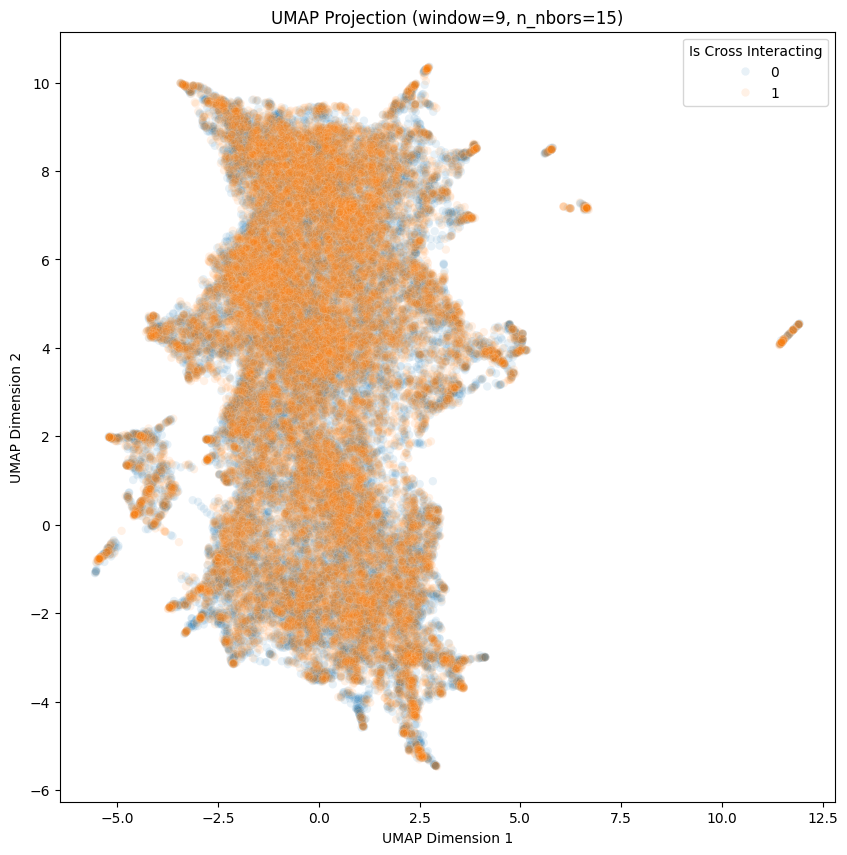

In [5]:
label_var = 'is_cross_interacting'  # Change this to change the coloring in the plot!

umap_result_df = pd.DataFrame(embedding, columns=["UMAP_1", "UMAP_2"])
umap_result_df["label"] = ppi_merged_df[label_var]

plt.figure(figsize=(10, 10))
sns.scatterplot(
    x="UMAP_1", y="UMAP_2", hue="label", data=umap_result_df, alpha=0.1
)
plt.title(f"UMAP Projection (window={n_aa_neighbors}, n_nbors={n_nbors})")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(title=label_var.replace('_', ' ').title())
plt.show()

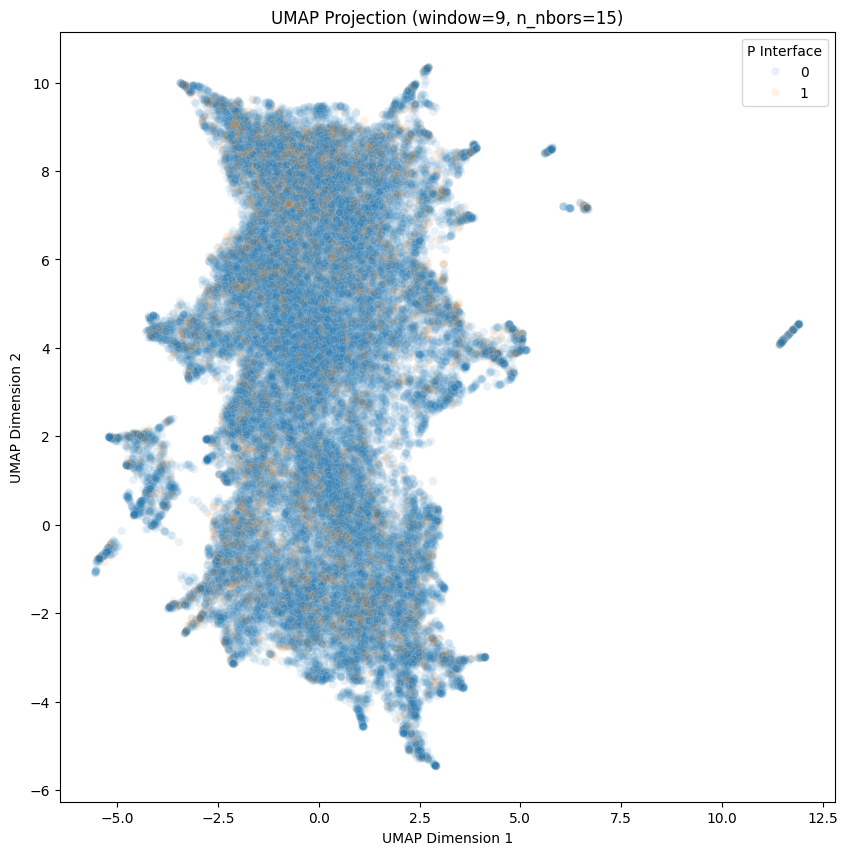

In [6]:
label_var = 'p_interface'  # Change this to change the coloring in the plot!

umap_result_df = pd.DataFrame(embedding, columns=["UMAP_1", "UMAP_2"])
umap_result_df["label"] = ppi_merged_df[label_var]

plt.figure(figsize=(10, 10))
sns.scatterplot(
    x="UMAP_1", y="UMAP_2", hue="label", data=umap_result_df, alpha=0.1
)
plt.title(f"UMAP Projection (window={n_aa_neighbors}, n_nbors={n_nbors})")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(title=label_var.replace('_', ' ').title())
plt.show()

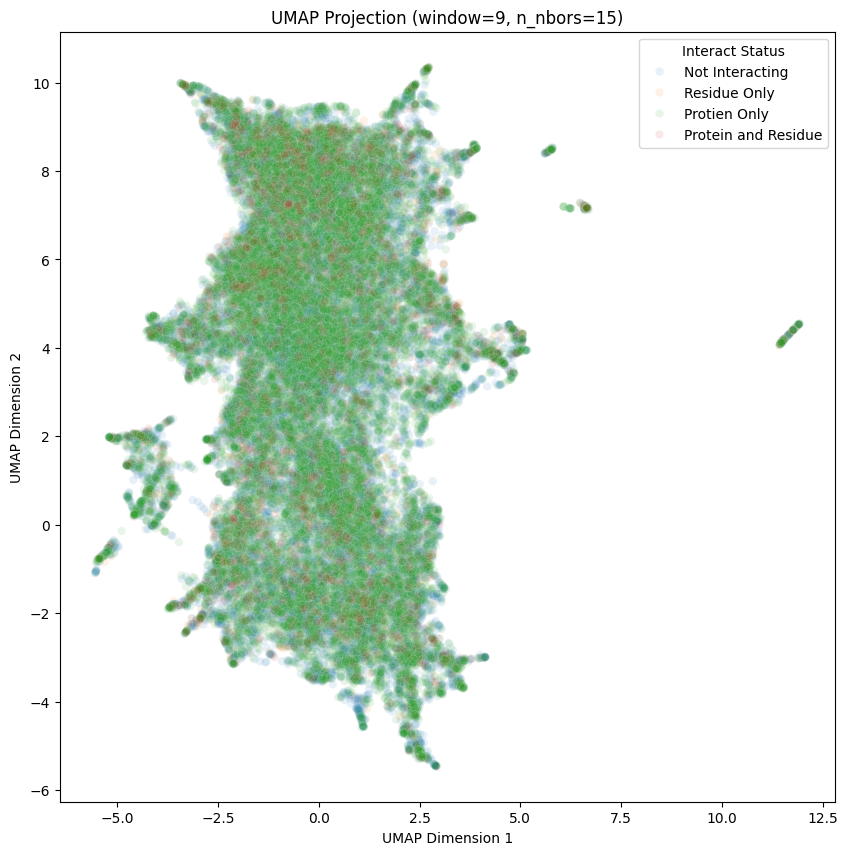

In [7]:
mapping = {
    (0, 0): "Not Interacting",
    (0, 1): "Protien Only",
    (1, 0): "Residue Only",
    (1, 1): "Protein and Residue"
}
ppi_merged_df['interact_status'] = ppi_merged_df.apply(lambda row: mapping[(row["p_interface"], row["is_cross_interacting"])], axis=1)

label_var = 'interact_status'  # Change this to change the coloring in the plot!

umap_result_df = pd.DataFrame(embedding, columns=["UMAP_1", "UMAP_2"])
umap_result_df["label"] = ppi_merged_df[label_var]

plt.figure(figsize=(10, 10))
sns.scatterplot(
    x="UMAP_1", y="UMAP_2", hue="label", data=umap_result_df, alpha=0.1
)
plt.title(f"UMAP Projection (window={n_aa_neighbors}, n_nbors={n_nbors})")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(title=label_var.replace('_', ' ').title())
plt.show()

Creating a UMAP with only Not Interacting and Both

In [8]:
reduced_ppi_df = ppi_merged_df[(ppi_merged_df.interact_status == 'Not Interacting') | (ppi_merged_df.interact_status == 'Protein and Residue')]
reduced_umap_df = reduced_ppi_df[umap_cols]

n_nbors = 15  # Change this to change number of neighbors!
umap_model = umap.UMAP(n_neighbors=n_nbors, min_dist=0.1, n_components=2, random_state=42)
embedding = umap_model.fit_transform(reduced_umap_df)

/home/jacobr/Documents/Masters/MSc_SML/scientific-machine-learning-project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jacobr/Documents/Masters/MSc_SML/scientific-machine-learning-project/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [9]:
print(reduced_ppi_df.interact_status.value_counts())
print(f'{embedding.shape=}, total_resdues={reduced_ppi_df.interact_status.size}')

interact_status
Not Interacting        19081
Protein and Residue     2017
Name: count, dtype: int64
embedding.shape=(21098, 2), total_resdues=21098


Plot and color reduced UMAP

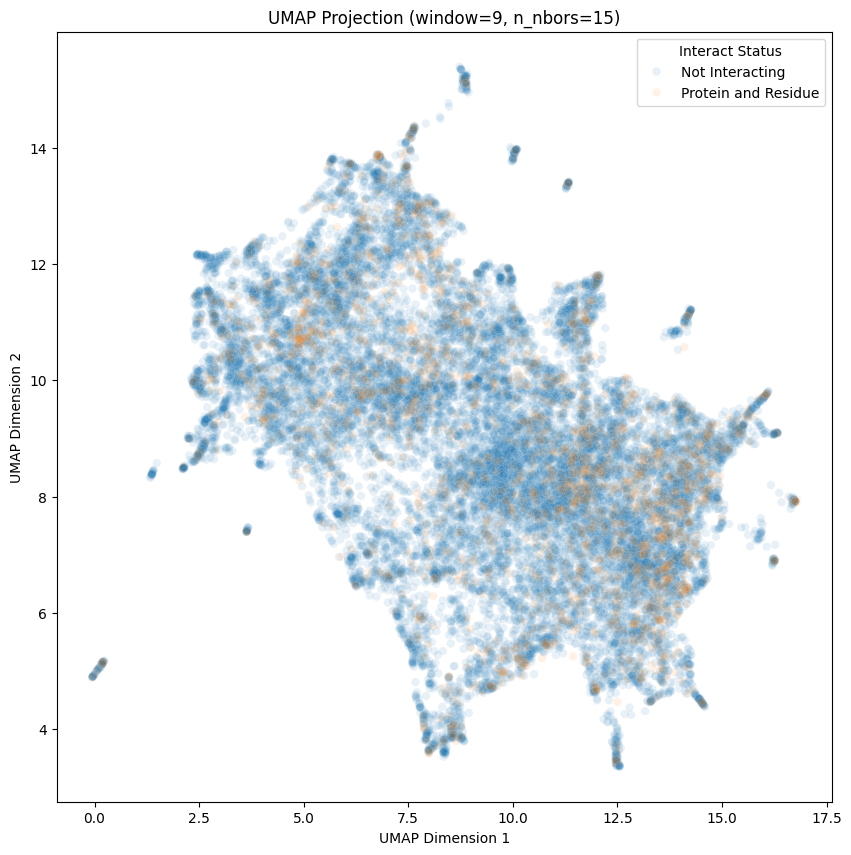

In [10]:
label_var = 'interact_status'  # Change this to change the coloring in the plot!

umap_result_df = pd.DataFrame(embedding, columns=["UMAP_1", "UMAP_2"])
umap_result_df["label"] = reduced_ppi_df.interact_status.values

plt.figure(figsize=(10, 10))
sns.scatterplot(
    x="UMAP_1", y="UMAP_2", hue="label", data=umap_result_df, alpha=0.1
)
plt.title(f"UMAP Projection (window={n_aa_neighbors}, n_nbors={n_nbors})")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(title=label_var.replace('_', ' ').title())
plt.show()